# Recall: Understanding the Metric

---

## 1. The Idea
**Recall** asks:
> “Out of all the actual Positives, how many did my model correctly find?”

It’s about the *completeness* of detection.

- **High recall:** Model catches most positives.
- **Low recall:** Model is missing many positives.

---

## 2. Confusion Matrix Refresher
|                | Pred = Positive | Pred = Negative |
|----------------|-----------------|-----------------|
| **True = Pos** | TP (true pos)   | FN (false neg)  |
| **True = Neg** | FP (false pos)  | TN (true neg)   |

---

## 3. Formula
- $\text{Recall} = \frac{TP}{TP + FN}$
  - **Numerator (TP):** Correctly predicted positives.
  - **Denominator (TP + FN):** All actual positives.

So recall = fraction of real positives caught by the model.

---

## 4. Example
Suppose there are 100 patients with a disease (actual positives).
- The model correctly predicts 80 of them → TP = 80.
- It misses 20 patients → FN = 20.

$$
\text{Recall} = \frac{80}{80 + 20} = \frac{80}{100} = 0.8
$$

👉 **Recall = 80%.**

---

## 5. Intuition
Recall cares about **not missing positives**.

Example: In medical tests, you want high recall (don’t miss sick people, even if you raise some false alarms).


In [2]:
# Example: Calculating Recall in Python

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Manual calculation
TP = sum((yt == 1) and (yp == 1) for yt, yp in zip(y_true, y_pred))
FN = sum((yt == 1) and (yp == 0) for yt, yp in zip(y_true, y_pred))
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Recall: {recall:.2f}")

# Using sklearn
from sklearn.metrics import recall_score
print(f"Recall (sklearn): {recall_score(y_true, y_pred):.2f}")

Recall: 0.80
Recall (sklearn): 0.80


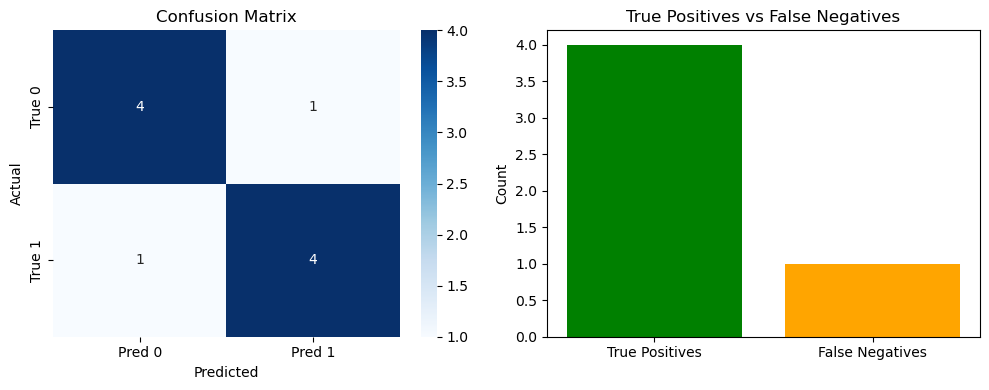

In [3]:
# Visualization: Recall with Confusion Matrix and Bar Plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use existing y_true and y_pred from previous cells

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Bar plot: True Positives vs False Negatives
TP = sum((yt == 1) and (yp == 1) for yt, yp in zip(y_true, y_pred))
FN = sum((yt == 1) and (yp == 0) for yt, yp in zip(y_true, y_pred))
plt.subplot(1, 2, 2)
plt.bar(['True Positives', 'False Negatives'], [TP, FN], color=['green', 'orange'])
plt.title('True Positives vs False Negatives')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
